In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
# Folder paths (adjust if needed)
base_dir = "Dataset"
train_dir = os.path.join(base_dir, "Train")
val_dir = os.path.join(base_dir, "Validation")
test_dir = os.path.join(base_dir, "Test")

# Image and training parameters
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10


In [3]:
# Image normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Check label mapping
print("Class indices:", train_generator.class_indices)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Class indices: {'Fake': 0, 'Real': 1}


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 672s 153ms/step - accuracy: 0.7723 - loss: 0.4590 - val_accuracy: 0.8747 - val_loss: 0.2963
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 671s 153ms/step - accuracy: 0.9074 - loss: 0.2224 - val_accuracy: 0.8873 - val_loss: 0.2659
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 678s 155ms/step - accuracy: 0.9354 - loss: 0.1620 - val_accuracy: 0.9004 - val_loss: 0.2405
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 671s 153ms/step - accuracy: 0.9462 - loss: 0.1325 - val_accuracy: 0.9320 - val_loss: 0.1676
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 679s 155ms/step - accuracy: 0.9548 - loss: 0.1141 - val_accuracy: 0.9326 - val_loss: 0.1644
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 679s 155ms/step - accuracy: 0.9590 - loss: 0.0999 - val_accuracy: 0.9401 - val_loss: 0.1495
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1376s 314ms/step - accuracy: 0.9635 - loss: 0.0907 - val_accuracy: 0.9358 - val_loss: 0.1591
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 2664s 609ms/step - accuracy: 0

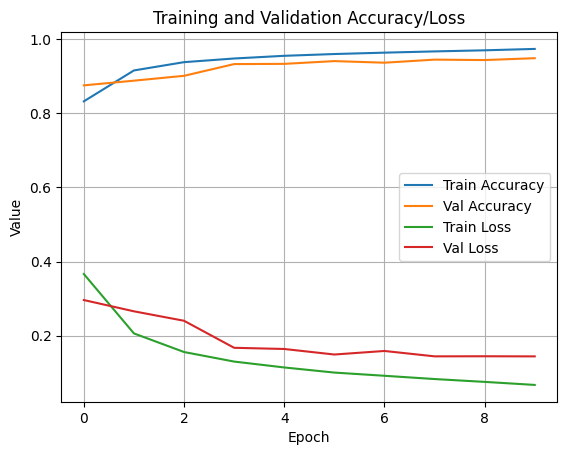

In [6]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Training and Validation Accuracy/Loss")
plt.grid(True)
plt.show()


In [7]:
loss, acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")


10905/10905 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9173 - loss: 0.2240

✅ Test Accuracy: 89.19%


In [8]:
model.save("deepfake_model.h5")
print("Model saved as deepfake_model.h5")


Model saved as deepfake_model.h5
